### Data Class

In [84]:
import random

class Sentiment:
    NEGATIVE = "NEGATIVE"
    NEUTRAL = "NEUTRAL"
    POSITIVE = "POSITIVE"

class Review:
    def __init__(self, text, score):
        self.text = text
        self.score = score
        self.sentiment = self.get_sentiment()
        
    def get_sentiment(self):
        if self.score <= 2:
            return Sentiment.NEGATIVE
        elif self.score == 3:
            return Sentiment.NEUTRAL
        else: #Score of 4 or 5
            return Sentiment.POSITIVE

class ReviewContainer:
    def __init__(self, reviews):
        self.reviews = reviews
        
    def get_text(self):
        return [x.text for x in self.reviews]
    
    def get_sentiment(self):
        return [x.sentiment for x in self.reviews]
        
    def evenly_distribute(self):
        negative = list(filter(lambda x: x.sentiment == Sentiment.NEGATIVE, self.reviews))
        positive = list(filter(lambda x: x.sentiment == Sentiment.POSITIVE, self.reviews))
        positive_shrunk = positive[:len(negative)]
        self.reviews = negative + positive_shrunk
        random.shuffle(self.reviews)
        
        

### Load Data

In [85]:
import json

file_name = './data/sentiment/books_small_10000.json'

reviews = []
with open(file_name) as f:
    for line in f:
        review = json.loads(line)
        reviews.append(Review(review['reviewText'], review['overall']))
        
#reviews[5].text
#reviews[5].score
reviews[5].sentiment

        

'POSITIVE'

### Prep Data

In [86]:
from sklearn.model_selection import train_test_split

training, test = train_test_split(reviews, test_size=0.33, random_state=42)

train_container = ReviewContainer(training)

test_container = ReviewContainer(test)

In [87]:
train_container.evenly_distribute()
train_x = train_container.get_text()
train_y = train_container.get_sentiment()

test_container.evenly_distribute()
test_x = test_container.get_text()
test_y = test_container.get_sentiment()

print(train_y.count(Sentiment.POSITIVE))
print(train_y.count(Sentiment.NEGATIVE))

436
436


#### Bag of words vectorization

In [88]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# This book is great !
# This book was so bad

vectorizer = TfidfVectorizer()
train_x_vectors = vectorizer.fit_transform(train_x)

test_x_vectors = vectorizer.transform(test_x)

print(train_x[0])
print(train_x_vectors[0].toarray())





I am a Born Again Christian who regularly debates atheists on Google+ about all things Christian.  I was hoping to find something of use in this book but I was disappointed.  As was said in another review, you can't start out with unfounded facts then &#34;prove&#34; your point with only a few, ridiculous arguments against.  This wouldn't work in a courtroom nor does it in religious debate.
[[0. 0. 0. ... 0. 0. 0.]]


## Classification

#### Linear SVM



















In [89]:
from sklearn import svm

clf_svm = svm.SVC(kernel='linear')

clf_svm.fit(train_x_vectors, train_y)

test_x[0]

clf_svm.predict(test_x_vectors[0])







array(['POSITIVE'], dtype='<U8')

#### Naive Bayes

In [90]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

clf_gnb = DecisionTreeClassifier()
clf_gnb.fit(train_x_vectors, train_y)

clf_gnb.predict(test_x_vectors[0])

array(['POSITIVE'], dtype='<U8')

#### Logistic Regression

In [91]:
from sklearn.linear_model import LogisticRegression

clf_log = LogisticRegression()
clf_log.fit(train_x_vectors, train_y)

clf_log.predict(test_x_vectors[0])


array(['POSITIVE'], dtype='<U8')

## Evaluation

In [92]:
# Mean Accuracy
print(clf_svm.score(test_x_vectors, test_y))
print(clf_gnb.score(test_x_vectors, test_y))
print(clf_log.score(test_x_vectors, test_y))

0.8076923076923077
0.6394230769230769
0.8052884615384616


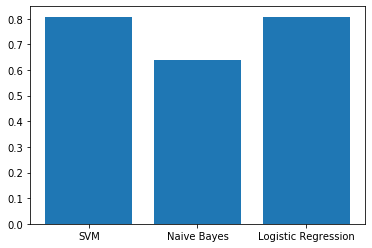

In [93]:
import numpy as np
import matplotlib.pyplot as plt
 

height = [clf_svm.score(test_x_vectors, test_y),clf_gnb.score(test_x_vectors, test_y),clf_log.score(test_x_vectors, test_y)]
bars = ('SVM', 'Naive Bayes', 'Logistic Regression')
y_pos = np.arange(len(bars))
plt.bar(y_pos, height)
plt.xticks(y_pos, bars)
plt.show()


In [94]:
# F1 Scores
from sklearn.metrics import f1_score

f1_score(test_y, clf_svm.predict(test_x_vectors), average=None, labels=[Sentiment.POSITIVE, Sentiment.NEGATIVE])
#f1_score(test_y, clf_log.predict(test_x_vectors), average=None, labels=[Sentiment.POSITIVE, Sentiment.NEUTRAL, Sentiment.NEGATIVE])




array([0.80582524, 0.80952381])

In [95]:
test_set = ['very fun', "bad book do not buy", 'horrible waste of time']
new_test = vectorizer.transform(test_set)

clf_svm.predict(new_test)


array(['POSITIVE', 'NEGATIVE', 'NEGATIVE'], dtype='<U8')

# Tuning our model (with Grid Search)


In [96]:
from sklearn.model_selection import GridSearchCV

parameters = {'kernel': ('linear', 'rbf'), 'C': (1,4,8,16,32)}

svc = svm.SVC()
clf = GridSearchCV(svc, parameters, cv=5)
clf.fit(train_x_vectors, train_y)




GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': (1, 4, 8, 16, 32), 'kernel': ('linear', 'rbf')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

## Saving Model

#### Save model

In [97]:
import pickle

with open('./models/sentiment_classifier.pkl', 'wb') as f:
    pickle.dump(clf, f)

#### Load model

In [98]:
with open('./models/sentiment_classifier.pkl', 'rb') as f:
    loaded_clf = pickle.load(f)

In [99]:
print(test_x[0])

loaded_clf.predict(test_x_vectors[0])

I loved this book! The characters were amazing. The sex scene was just OOLALA! I can't wait for her second book! This is a must read! Get yours today.


array(['POSITIVE'], dtype='<U8')

In [100]:
import speech_recognition as sr

filename = "LongWelcome.wav"
r = sr.Recognizer()

with sr.AudioFile(filename) as source:
    audio_data = r.record(source)
    text = r.recognize_google(audio_data)
    file1 = open("textfile.txt","w")#write mode 
    file1.write(text) 
    file1.close() 

In [101]:
test_set = []
file1 = open("textfile.txt","r") 
test_set = file1.readlines()
print(test_set)
file1.close() 

new_test = vectorizer.transform(test_set)

loaded_clf.predict(new_test)

["thank you for choosing the Olympus dictation management system free Olympus dictation management system gives you the power to manage your dictations transcriptions and document seamlessly and to improve the productivity of your daily work for example you can automatically sent to the equation files or transcribed documents the assistant of the over by email if you're using the speech recognition software the speech recognition engine works in the background to support your document creation we help you enjoy the simple flexible reliable and Secure solutions for blenders thank you for choosing the Olympus dictation management system the Olympus dictation management system gives you the power to manage your dictations transcriptions and document seamlessly and to improve the productivity of your daily work for example you can automatically sent to the equation files transcribe documents your system to the author by email if you're using the speech recognition software the speech recog

array(['POSITIVE'], dtype='<U8')

In [105]:
test_1 = [" this book is good" ]
new_test = vectorizer.transform(test_1)

loaded_clf.predict(new_test)

array(['POSITIVE'], dtype='<U8')

In [103]:
test_2 = ["I am very happy with all my purchases since I have been shopping on Amazon website. I never had to return any of my items. I buy for myself, any member of my family and friends. I like how I can zoom in to see the photos of the item that I am purchasing from all angles. This helps very much with the decision making if I will really make the purchase. Description of the product as well. I like how I can track my items while it’s in transit to me. The convenience of shopping online is the best. You can get just about everything by shopping online on Amazon. The option to pick up my package at locations nearest to me is great. I just love Amazon Prime as well. How can I forget that???? I recommend Amazon to anyone that I come in contact with and they’re looking to make a purchase. I always say look ???? it up on Amazon from the comfort and the convenience of wherever you are. Make your purchase and it will come right to your door."]
new_test = vectorizer.transform(test_2)

loaded_clf.predict(new_test)

array(['POSITIVE'], dtype='<U8')